In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Loading Data

In [2]:
df = pd.read_csv("/content/Advertising.csv")

In [3]:
df.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [4]:
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

In [5]:
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

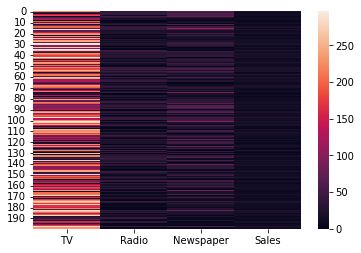

In [6]:
sb.heatmap(df)

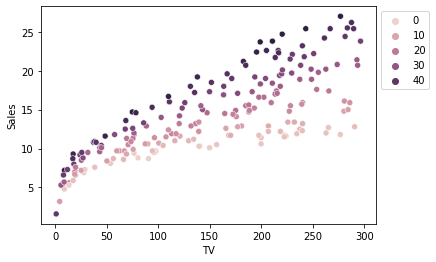

In [7]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sb.scatterplot( x="TV", y='Sales', data=df,
				hue='Radio')

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


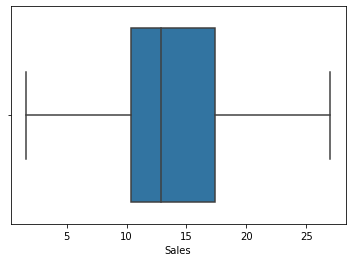

In [8]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt




sns.boxplot(x='Sales', data=df)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


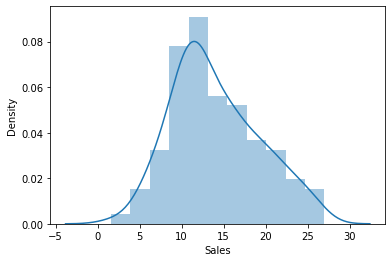

In [9]:
sns_plot = sb.distplot(df["Sales"])

## Splitting Data

In [10]:
features = ["TV", "Radio", "Newspaper"]
X = df[features]
target = "Sales"
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [11]:
y_mean = y_train.mean()
print("Mean Error: ", y_mean)
y_pred_baseline = [y_mean] * len(y_train)
print("Baseline Error: ", y_pred_baseline[:5])
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("MAE Baseline: ", mae_baseline)

Mean Error:  14.1
Baseline Error:  [14.1, 14.1, 14.1, 14.1, 14.1]
MAE Baseline:  4.12


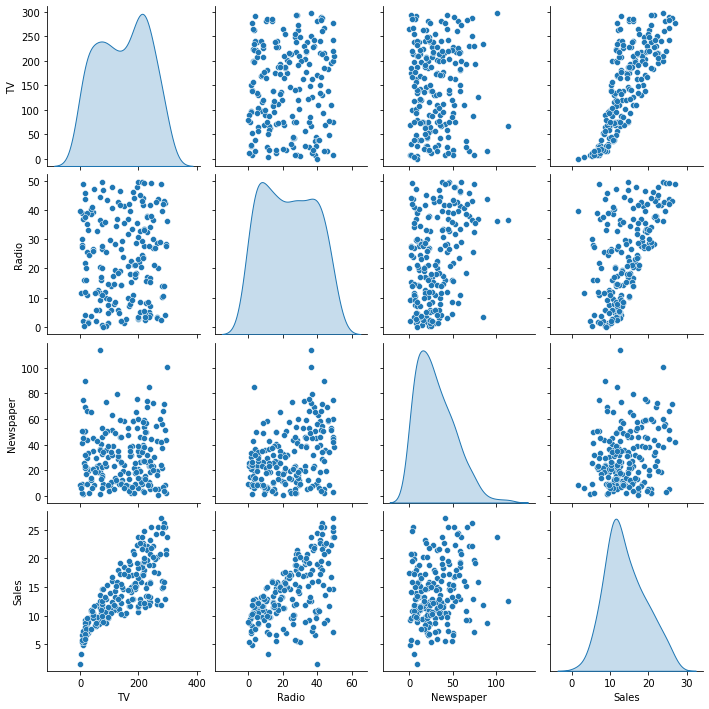

In [12]:
sns.pairplot(df, diag_kind='kde')   

### Model Instantiation

In [13]:
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

#### Predicitions on Training Data

In [14]:
y_pred_training = model.predict(X_train)
print("Predicted values after model: ", y_pred_training[:5])
mae_pred_training = mean_absolute_error(y_train, y_pred_training)
print("MAE for training data after prediction: ", mae_pred_training)

Predicted values after model:  [ 9.68827502 12.67337707 10.0553326   8.20010235 13.49562077]
MAE for training data after prediction:  1.1984678961500137


#### Predictions on Test Data

In [15]:
y_pred_test = model.predict(X_test)
print("Predicted values after model: ", y_pred_test[:5])
mae_pred_test = mean_absolute_error(y_test, y_pred_test)
print("MAE for test data after prediction: ", mae_pred_test)

Predicted values after model:  [16.4080242  20.88988209 21.55384318 10.60850256 22.11237326]
MAE for test data after prediction:  1.4607567168117603


##### Extract Intercept

In [16]:
intercept = model.intercept_
intercept

2.979067338122629

##### Extract Coefficient

In [17]:
coefficient = model.coef_
coefficient

array([0.04472952, 0.18919505, 0.00276111])

## Multi-LinearRegression Equation

In [18]:
print(f"Sales = {intercept} + {coefficient[0]} * TV + {coefficient[1]} * Radio + {coefficient[2]} * Newspaper")

Sales = 2.979067338122629 + 0.044729517468716326 * TV + 0.18919505423437652 * Radio + 0.0027611143413671935 * Newspaper


## Model Evaluation

In [19]:
print("Score of training data: ", model.score(X_train, y_train))
print("Score of test data: ", model.score(X_train, y_train))

Score of training data:  0.8957008271017818
Score of test data:  0.8957008271017818


## Actual vs Prediction [Training Data]

Text(0.5, 1.0, 'Actual vs Predicted [Training Data]')

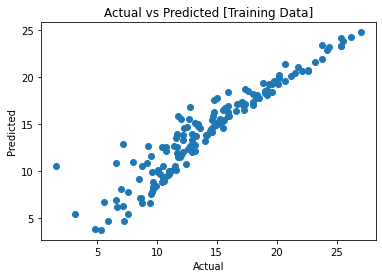

In [20]:
plt.scatter(y_train, y_pred_training)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted [Training Data]")

## Actual vs Prediction [Test Data]

Text(0.5, 1.0, 'Actual vs Predicted [Test Data]')

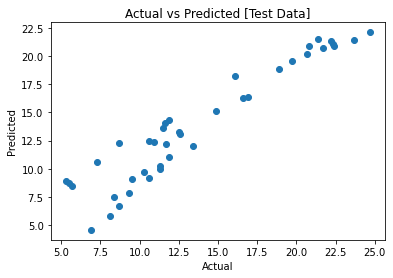

In [21]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted [Test Data]")

## Dataframe of Actual vs Predicted Sales

In [22]:
y_pred_test_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test})
y_pred_test_df.head()

Actual  Predicted
95     16.9  16.408024
15     22.4  20.889882
30     21.4  21.553843
158     7.3  10.608503
128    24.7  22.112373